{0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction', 15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack', 19: 'Hepatitis', 20: 'Hepatitis B', 21: 'Hepatitis C', 22: 'Hepatitis D', 23: 'Hepatitis E', 24: 'Hypertension ', 25: 'Hyperthyroidism', 26: 'Hypoglycemia', 27: 'Hypothyroidism', 28: 'Impetigo', 29: 'Jaundice', 30: 'Malaria', 31: 'Migraine', 32: 'Osteoarthristis', 33: 'Paralysis (brain hemorrhage)', 34: 'Peptic ulcer diseae', 35: 'Pneumonia', 36: 'Psoriasis', 37: 'Tuberculosis', 38: 'Typhoid', 39: 'Urinary tract infection', 40: 'Varicose veins', 41: 'hepatitis A', 42: 'hepatitis B'}
Tuning hyperparameters for SVC...


c:\Users\Do Thien Hoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
SVC Accuracy: 0.9535
Tuning hyperparameters for RandomForest...


c:\Users\Do Thien Hoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 200}
RandomForest Accuracy: 0.9302


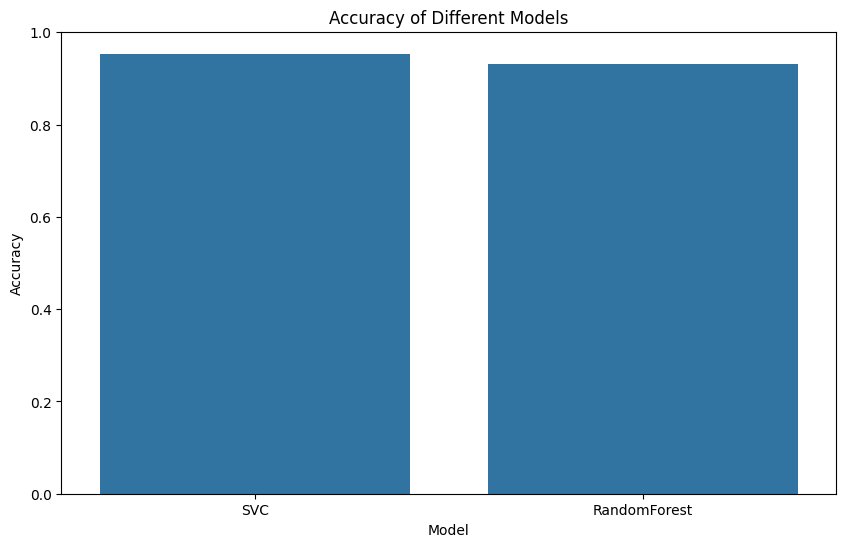

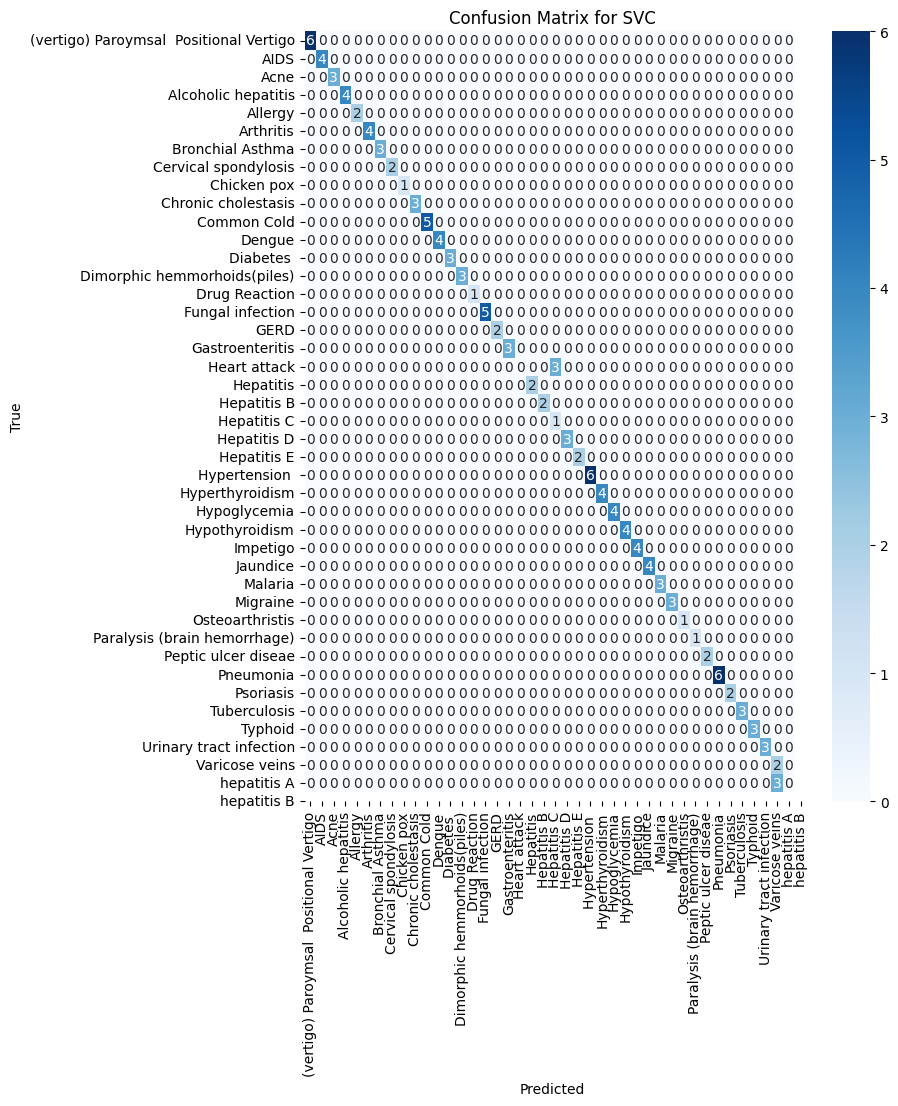

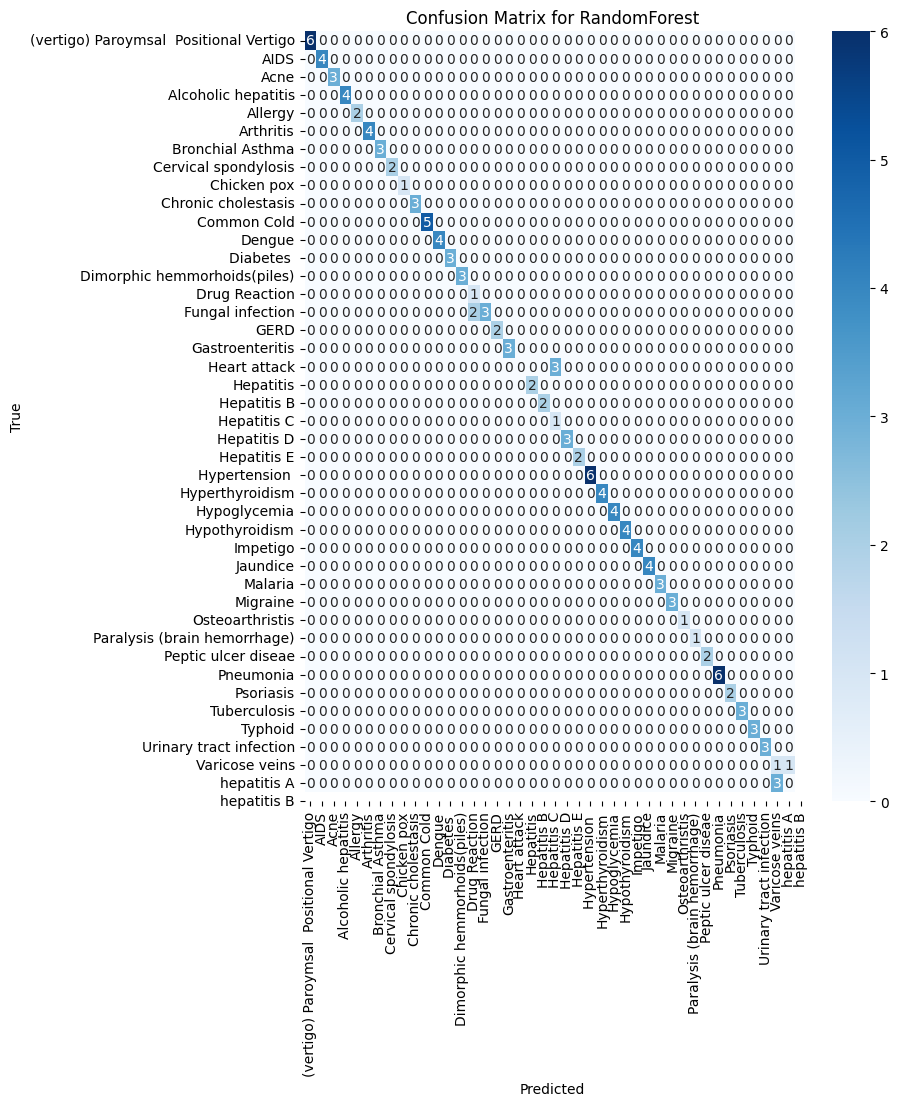

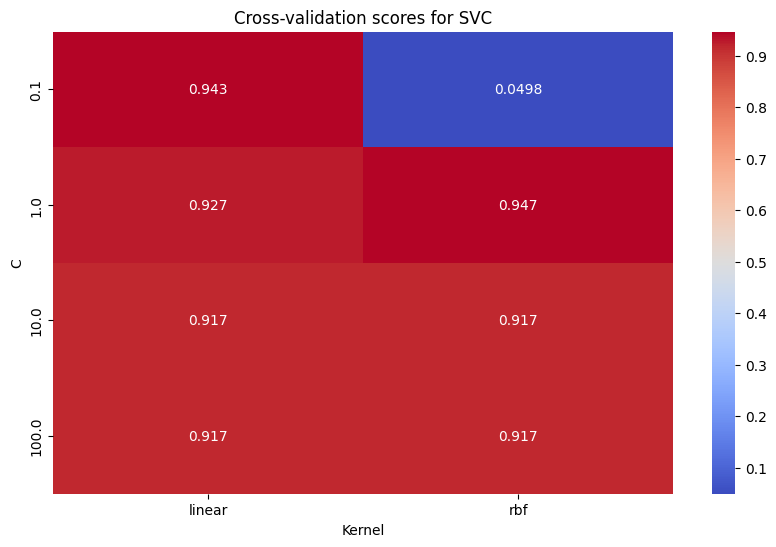

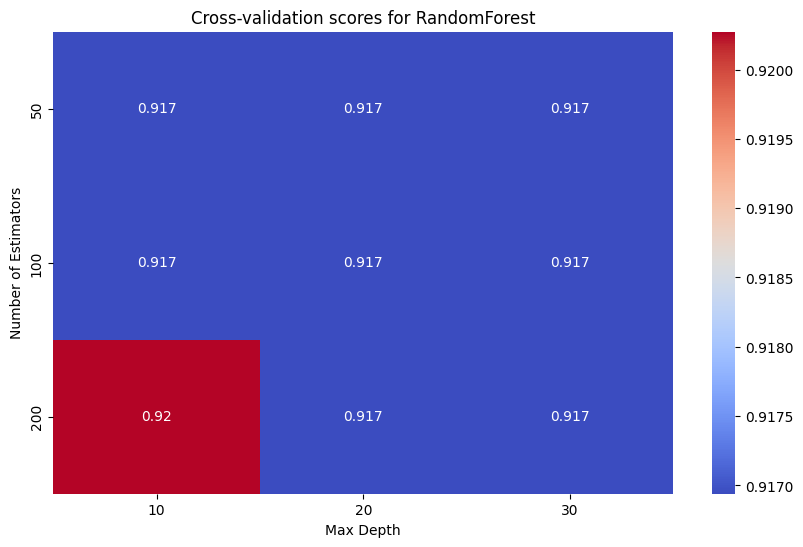

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
#dataset = pd.read_csv('Training_no_duplicates.csv')
dataset = pd.read_csv('Training.csv')

# Separate features and target
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# Encode target variable
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
# Create the mapping dictionary
diseases_list = {encoded: disease for encoded, disease in zip(le.transform(le.classes_), le.classes_)}

print(diseases_list)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=33)

# Define parameter grids for each model
param_grids = {
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }
}

# Create a dictionary to store models
models = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(random_state=50)
}

# Lists to store results
model_names = []
accuracies = []
confusion_matrices = []
best_params = {}

# Loop through the models, perform GridSearchCV, train, test, and collect results
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    best_params[model_name] = grid_search.cv_results_

    # Test the best model
    predictions = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    model_names.append(model_name)
    accuracies.append(accuracy)
    confusion_matrices.append(confusion_matrix(y_test, predictions))

    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

# Plot confusion matrices
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(8, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_names[i]}')
    plt.show()

# Plot hyperparameter tuning results as heatmap
for model_name, cv_results in best_params.items():
    results = pd.DataFrame(cv_results)
    
    if model_name == 'SVC':
        scores = results[['param_C', 'param_kernel', 'mean_test_score']]
        scores_pivot = scores.pivot_table(index='param_C', columns='param_kernel', values='mean_test_score')
        plt.figure(figsize=(10, 6))
        sns.heatmap(scores_pivot, annot=True, cmap='coolwarm', fmt='.3g')
        plt.title(f'Cross-validation scores for {model_name}')
        plt.xlabel('Kernel')
        plt.ylabel('C')
        plt.show()
    
    if model_name == 'RandomForest':
        scores = results[['param_n_estimators', 'param_max_depth', 'mean_test_score']]
        scores_pivot = pd.pivot_table(scores, index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
        plt.figure(figsize=(10, 6))
        sns.heatmap(scores_pivot, annot=True, cmap='coolwarm', fmt='.3g')
        plt.title(f'Cross-validation scores for {model_name}')
        plt.xlabel('Max Depth')
        plt.ylabel('Number of Estimators')
        plt.show()

